## Synthetischer Datensatz mit Ollama

In [ ]:
import ollama
import pandas as pd
from io import StringIO
import concurrent.futures
from tqdm import tqdm  # Fortschrittsanzeige

def generate_batch(num_rows: int = 50, model: str = "mistral"):
    """Generiert einen Batch synthetischer Blog-Daten."""
    prompt = f"""
    Erstelle eine **CSV-Datei mit genau {num_rows} Blogeinträgen**.

    ❗ **WICHTIG:**
    - **KEIN Code, KEINE Erklärungen**, nur die reinen CSV-Daten.
    - **Verwende `|` als Trennzeichen**.
    - **KEINE leeren Werte** – jede Zelle muss befüllt sein.

    **Spaltenformat:**
    - ID: Eindeutige Nummer (1 bis {num_rows})
    - Titel: Ein realistischer Blog-Titel, passend zur Kategorie.
    - Inhalt: **Mindestens 20 Wörter**, idealerweise 50-100 Wörter.
    - Autor: Fiktiver Vor- und Nachname.
    - Kategorie: Eine aus (Technologie, Wirtschaft, Sport, Gesundheit, Energie, Politik, Kryptos, Wissenschaft, Kultur, Ernährung).
    - Sentiment: Eine aus (positiv, neutral, negativ).
    - Wortanzahl: Ganze Zahl zwischen 50 und 100.
    - Datum: Zufällig zwischen 2023-01-01 und 2024-12-31 (Format: YYYY-MM-DD).
    - Uhrzeit: Zufällig zwischen 00:00 und 23:59 (Format: HH:MM).
    - Quelle: Eine aus (TechNews, FinanceDaily, SportExpress, CryptoTimes, HealthWeekly, EnergyReview, WorldPolitics, ScienceToday).
    - Shares: Ganze Zahl zwischen 0 und 5000.

    **Format-Beispiel (erste Zeile der CSV):**
    ```
    ID|Titel|Inhalt|Autor|Kategorie|Sentiment|Wortanzahl|Datum|Uhrzeit|Quelle|Shares
    1|Bitcoin steigt auf Rekordhoch|Experten analysieren den jüngsten Anstieg des Bitcoin-Kurses und erklären, welche Faktoren den Preis beeinflussen könnten.|Max Schmidt|Kryptowährungen|positiv|450|2024-02-15|14:23|CryptoTimes|3200
    ```

    🔹 **Generiere jetzt die vollständige CSV mit {num_rows} Zeilen.**
    """

    response = ollama.chat(model=model, messages=[{'role': 'user', 'content': prompt}])
    csv_data = response['message']['content']

    # 🛠 Falls Ollama Codeblöcke (` ``` `) generiert, diese entfernen
    csv_data = csv_data.strip().replace("```csv", "").replace("```", "")

    try:
        df = pd.read_csv(StringIO(csv_data), sep="|", skipinitialspace=True)
        return df
    except Exception as e:
        print(f"⚠ Fehler beim Parsen der CSV: {e}")
        return pd.DataFrame()  # Falls ein Fehler auftritt, wird ein leerer DataFrame zurückgegeben
# 📌 Funktion zur parallelen Generierung eines großen Datensatzes

def generate_large_dataset_parallel(total_rows: int = 1000, batch_size: int = 50):
    """
    Parallele Generierung großer Mengen synthetischer Daten mit Fortschrittsanzeige.

    - `total_rows`: Gesamtzahl der zu generierenden Datensätze
    - `batch_size`: Anzahl der Datensätze pro Anfrage
    - Nutzt Threading für parallele API-Anfragen
    """

    # 📌 Berechne die Anzahl der Batches
    num_batches = total_rows // batch_size

    # 📌 Leere Liste zum Speichern der einzelnen Batches
    all_data = []

    # 📌 Thread-Pool zur parallelen Anfrageverarbeitung
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # 🚀 Starte `num_batches` viele parallele Batch-Anfragen
        futures = [executor.submit(generate_batch, batch_size) for _ in range(num_batches)]

        # 📊 Fortschrittsanzeige mit tqdm
        for i, future in enumerate(tqdm(concurrent.futures.as_completed(futures), total=num_batches, desc="Generiere Daten", unit="Batch")):
            # 🛠 Ergebnis der API-Anfrage abrufen
            batch_df = future.result()

            # 📌 Batch-Daten zur Gesamtliste hinzufügen
            all_data.append(batch_df)

    # 📌 Alle Batches zu einem DataFrame kombinieren
    final_df = pd.concat(all_data, ignore_index=True)

    # ✅ Den vollständigen synthetischen Datensatz zurückgeben
    return final_df

# 📌 Hauptprogramm: Starte die Daten-Erzeugung
if __name__ == "__main__":
    # 📌 Starte die Generierung mit parallelen Anfragen
    df = generate_large_dataset_parallel(total_rows=1000, batch_size=50)

    # 📌 Speichere die generierten Daten in einer CSV-Datei
    df.to_csv("synthetic_blog_dataset.csv", sep="|", encoding="utf-8-sig", index=False)

    # ✅ Bestätigungsausgabe, dass die Generierung erfolgreich war
    print("✅ Synthetischer Datensatz erfolgreich generiert!")


Generiere Daten:   0%|          | 0/20 [00:00<?, ?Batch/s]

### Tippfehler

In [ ]:
import random

def add_typo(text):
    if isinstance(text, str):
        text = text.replace("e", "3").replace("o", "0")
        if random.random() < 0.2:  # 20% Wahrscheinlichkeit für einen Extra-Tippfehler
            text = text[:-1] + random.choice(["!", "?", "#"])
    return text

df["Titel"] = df["Titel"].apply(add_typo)


### Synonyme

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Englisches Modell laden

def replace_synonyms(text):
    if not isinstance(text, str):
        return text
    doc = nlp(text)
    new_text = []
    for token in doc:
        if token.pos_ in ["NOUN", "ADJ", "VERB"] and random.random() < 0.3:  # 30% Chance auf Synonym
            new_text.append(random.choice(["Innovation", "Revolution", "Markt", "Trend"]))  # Dummy-Synonyme
        else:
            new_text.append(token.text)
    return " ".join(new_text)

df["Titel"] = df["Titel"].apply(replace_synonyms)


In [ ]:
df["Wortanzahl"] = pd.to_numeric(df["Wortanzahl"], errors="coerce")
df["Shares"] = pd.to_numeric(df["Shares"], errors="coerce")


In [ ]:
df.isna().sum()

ID             3
Titel         24
Inhalt        24
Autor         24
Kategorie     24
Sentiment     24
Wortanzahl    36
Datum         24
Uhrzeit       24
Quelle        24
Shares        36
dtype: int64

In [ ]:
df.dropna(inplace=True)  # Entfernt unvollständige Zeilen


## EDA

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, 0 to 1079
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1059 non-null   object 
 1   Titel       1059 non-null   object 
 2   Inhalt      1059 non-null   object 
 3   Autor       1059 non-null   object 
 4   Kategorie   1059 non-null   object 
 5   Sentiment   1059 non-null   object 
 6   Wortanzahl  1059 non-null   float64
 7   Datum       1059 non-null   object 
 8   Uhrzeit     1059 non-null   object 
 9   Quelle      1059 non-null   object 
 10  Shares      1059 non-null   float64
dtypes: float64(2), object(9)
memory usage: 99.3+ KB
None
  ID                                              Titel  \
0  1  N3u3 Entwicklung3n in d3r T3chn0l0gi3branch3 v...   
1  2    Wirtschaftskris3n i m Jahr 2025 : Ein3 Pr0gn0s3   
2  3  D3r n3u3 W3 Markt in d3r Krypt0sphär3 : Eth3r3...   
3  4  Di3 Wirtschaftskris3 v0n 2026 : Ein3 R3ttungsi...   
4  5        

In [ ]:
# Verteilung der Kategorien
print(df["Kategorie"].value_counts())

# Sentiment-Verteilung
print(df["Sentiment"].value_counts())

print(df["Kategorie"].value_counts(normalize=True))  # Zeigt die Verteilung

Kategorie
Wirtschaft         204
Kryptowährungen    165
Technologie        109
Gesundheit         104
Politik            103
Wissenschaft        99
Ernährung           92
Sport               85
Energie             85
Kryptos             11
Tierwelt             1
Kultur               1
Name: count, dtype: int64
Sentiment
positiv    755
negativ    168
neutral    136
Name: count, dtype: int64
Kategorie
Wirtschaft         0.192635
Kryptowährungen    0.155807
Technologie        0.102927
Gesundheit         0.098206
Politik            0.097262
Wissenschaft       0.093484
Ernährung          0.086874
Sport              0.080264
Energie            0.080264
Kryptos            0.010387
Tierwelt           0.000944
Kultur             0.000944
Name: proportion, dtype: float64


In [ ]:
df.Inhalt.unique()

array(['Die digitalen Zukunftsvisionäre präzisen...',
       'Die Wirtschaftswelten erforschen die wahrscheinlichen Auswirkungen...',
       'Experten diskutieren die Möglichkeiten einer Ethereum-Dominanz...',
       'Die Wirtschaftswelten erforschen die Notwendigkeit und Wirksamkeit...',
       'Sportjournalisten diskutieren die neuesten Trends und Entwicklungen...',
       'Experten diskutieren die Möglichkeiten und Potenziale...',
       'Fachleute diskutieren die notwendigen Schritte...',
       'Politikwissenschaftler diskutieren die möglichen Auswirkungen...',
       'Experten diskutieren die Möglichkeiten und Grenzen...',
       'Wissenschaftler diskutieren die Möglichkeiten und Grenzen...',
       'Fachleute diskutieren die neuesten Trends und Entwicklungen...',
       'Fachleute diskutieren die Möglichkeiten und Grenzen...',
       'Fachleute diskutieren die wirtschaftlichen Konsequenzen...',
       'Experten diskutieren die Möglichkeiten...',
       'Learn the fundamental rul

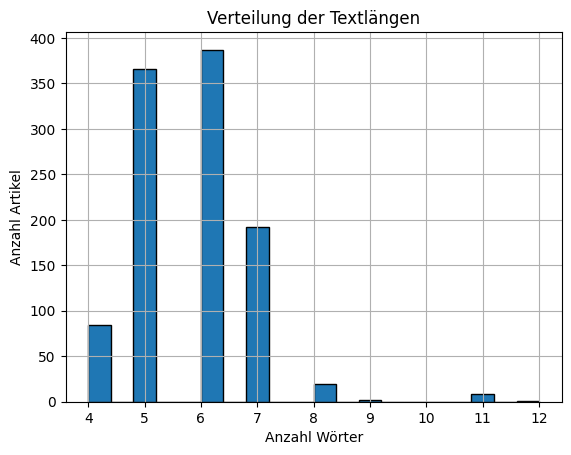

In [ ]:
# Textlängen-Verteilung
import matplotlib.pyplot as plt

df["Textlänge"] = df["Inhalt"].apply(lambda x: len(str(x).split()))
df["Textlänge"].hist(bins=20, edgecolor="black")
plt.xlabel("Anzahl Wörter")
plt.ylabel("Anzahl Artikel")
plt.title("Verteilung der Textlängen")
plt.show()


## Modelltraining

### Testdate unnd Zielvariable

In [ ]:
from sklearn.model_selection import train_test_split

# Entferne Zeilen mit fehlendem Sentiment
df = df.dropna(subset=["Sentiment"])

# Features (Texte) und Zielvariable (Sentiment) definieren
X = df["Inhalt"]
y = df["Sentiment"]

# Datensatz aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Zielvariable aus Test-Set entfernen
X_test_no_labels = X_test.copy()

### Model trainieren

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline mit TF-IDF-Vektorisierung + Logistische Regression
model = Pipeline([
    ("tfidf", TfidfVectorizer()),  
    ("clf", LogisticRegression(max_iter=200))  
])

# Modell trainieren
model.fit(X_train, y_train)

print("✅ Modelltraining abgeschlossen!")


✅ Modelltraining abgeschlossen!


### Testdaten auf Modell anwenden

In [ ]:
# Sentiment für Test-Daten ohne Labels vorhersagen
predictions = model.predict(X_test_no_labels)

# Test-Daten mit vorhergesagtem Sentiment speichern
df_test_predictions = pd.DataFrame({"Inhalt": X_test_no_labels, "Vorhergesagtes Sentiment": predictions})

print(df_test_predictions.head())  # Beispielhafte Ausgabe


                                                Inhalt  \
576  Sportjournalisten diskutieren die neuesten Tre...   
312  Sportjournalisten diskutieren die neuesten Tre...   
70   Sportjournalisten diskutieren die neuesten Tre...   
682  Fachleute diskutieren die Möglichkeiten und Gr...   
896  Experten diskutieren die Möglichkeiten und Gre...   

    Vorhergesagtes Sentiment  
576                  positiv  
312                  positiv  
70                   positiv  
682                  positiv  
896                  positiv  


### Model evaluieren

In [ ]:
from sklearn.metrics import classification_report

# Modell gegen echte Labels testen
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     negativ       1.00      0.95      0.97        40
     neutral       0.95      0.83      0.89        24
     positiv       0.96      0.99      0.98       148

    accuracy                           0.97       212
   macro avg       0.97      0.93      0.95       212
weighted avg       0.97      0.97      0.97       212

